In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("jawa tengah.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       305 non-null    float64       
 2   Tx       310 non-null    float64       
 3   Tavg     310 non-null    float64       
 4   RH_avg   310 non-null    float64       
 5   RR       243 non-null    float64       
 6   ss       310 non-null    float64       
 7   ff_x     312 non-null    float64       
 8   ddd_x    312 non-null    float64       
 9   ff_avg   312 non-null    float64       
 10  ddd_car  312 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-2-3f613b338d64>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.2,29.1,10.2,26.6
1,2023-02-01,25.0,31.2,0.4,27.8
2,2023-03-01,25.6,31.0,0.0,27.1
3,2023-04-01,25.2,32.2,0.2,27.8
4,2023-05-01,NaN,32.0,22.3,27.7
...,...,...,...,...,...
309,2023-10-28,26.2,33.7,NaN,29.8
310,2023-10-29,25.8,36.1,0.0,30.0
311,2023-10-30,26.0,34.6,0.0,30.1
312,2023-10-31,26.7,33.2,0.0,29.8


In [4]:
# cek duplikat
df1.duplicated().sum()

9

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.2,29.1,10.2,26.6
1,31,31,2023-01-02,24.9,29.4,26.8,27.1
2,59,60,2023-01-03,23.8,30.6,3.0,26.2
3,90,92,2023-01-04,23.9,32.2,7.2,26.2
4,120,123,2023-01-05,25.4,31.5,21.9,28.0
...,...,...,...,...,...,...,...
300,162,167,2023-12-06,24.6,33.3,NaN,28.8
301,192,198,2023-12-07,24.0,33.4,0.0,27.6
302,223,230,2023-12-08,21.4,30.6,0.0,25.5
303,254,262,2023-12-09,25.0,33.0,0.0,NaN


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          9
Tx          4
RR         69
Tavg        4
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

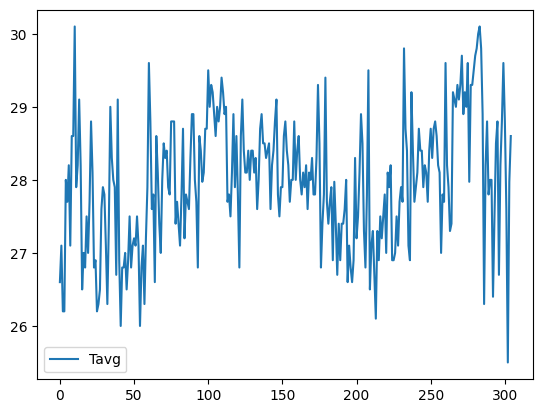

In [10]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

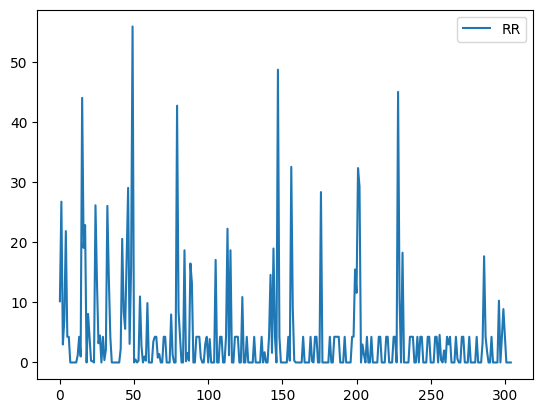

In [11]:
#plotting tavg
df1[['RR']].plot()

In [12]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.2,29.1,10.20000,26.600000,29.4,27.100000,26.80000
1,31,31,2023-01-02,24.9,29.4,26.80000,27.100000,30.6,26.200000,3.00000
2,59,60,2023-01-03,23.8,30.6,3.00000,26.200000,32.2,26.200000,7.20000
3,90,92,2023-01-04,23.9,32.2,7.20000,26.200000,31.5,28.000000,21.90000
4,120,123,2023-01-05,25.4,31.5,21.90000,28.000000,32.4,27.700000,4.28178
...,...,...,...,...,...,...,...,...,...,...
300,162,167,2023-12-06,24.6,33.3,4.28178,28.800000,33.4,27.600000,0.00000
301,192,198,2023-12-07,24.0,33.4,0.00000,27.600000,30.6,25.500000,0.00000
302,223,230,2023-12-08,21.4,30.6,0.00000,25.500000,33.0,27.973754,0.00000
303,254,262,2023-12-09,25.0,33.0,0.00000,27.973754,32.8,28.600000,0.00000


In [13]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,10.20000,26.600000,27.100000,26.80000
1,26.80000,27.100000,26.200000,3.00000
2,3.00000,26.200000,26.200000,7.20000
3,7.20000,26.200000,28.000000,21.90000
4,21.90000,28.000000,27.700000,4.28178
...,...,...,...,...
300,4.28178,28.800000,27.600000,0.00000
301,0.00000,27.600000,25.500000,0.00000
302,0.00000,25.500000,27.973754,0.00000
303,0.00000,27.973754,28.600000,0.00000


In [14]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,10.20000,26.600000,27.100000,26.80000
1,26.80000,27.100000,26.200000,3.00000
2,3.00000,26.200000,26.200000,7.20000
3,7.20000,26.200000,28.000000,21.90000
4,21.90000,28.000000,27.700000,4.28178
...,...,...,...,...
299,8.90000,29.600000,28.800000,4.28178
300,4.28178,28.800000,27.600000,0.00000
301,0.00000,27.600000,25.500000,0.00000
302,0.00000,25.500000,27.973754,0.00000


In [15]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,10.20000,26.600000,27.100000,26.80000,0
1,26.80000,27.100000,26.200000,3.00000,1
2,3.00000,26.200000,26.200000,7.20000,2
3,7.20000,26.200000,28.000000,21.90000,3
4,21.90000,28.000000,27.700000,4.28178,4
...,...,...,...,...,...
299,8.90000,29.600000,28.800000,4.28178,299
300,4.28178,28.800000,27.600000,0.00000,300
301,0.00000,27.600000,25.500000,0.00000,301
302,0.00000,25.500000,27.973754,0.00000,302


In [17]:
#data training dan testing
X = df1['Indeks']
y = df1["pta"]

X1 = df1['Tavg']
y1 = df1["pta"]

X2 = df1['RR']
y2 = df1["ptr"]

X3 = df1['Indeks']
y3 = df1["RR"]

In [18]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [19]:
X_train = np.array(X_train).reshape(-1, 1)

In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
#testing
X_test1 = np.array(X_test).reshape(-1, 1)
pred1 = lr.predict(X_test1)
pred1

array([28.13541743, 28.13541743, 27.88120523, 28.03373255, 27.98289011,
       27.77952035, 28.13541743, 28.28794475, 28.08457499, 28.28794475,
       28.33878718, 28.23710231, 28.03373255, 27.98289011, 27.42362328,
       27.83036279, 27.77952035, 28.7455267 , 28.03373255, 27.88120523,
       27.57615059, 27.62699303, 28.54215694, 28.4913145 , 28.44047206,
       28.59299938, 28.4913145 , 28.59299938, 28.79636914, 28.38962962,
       28.54215694, 28.44047206, 28.7455267 , 27.91870364, 28.59299938,
       28.59299938, 28.69468426, 28.79636914, 28.84721158, 28.94889646,
       28.9997389 , 28.84721158, 28.38962962, 27.0677262 , 28.03373255,
       28.33878718, 27.83036279, 27.93204767, 27.93204767, 27.11856864,
       27.67783547, 28.18625987, 28.33878718, 27.27109596, 28.03373255,
       28.33878718, 28.7455267 , 28.33878718, 27.72867791, 26.66098669,
       27.91870364])

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

0.7166400436140632

In [23]:
X_test['Indeks'] = X_test.index
X_test

243                                                    28.4
244                                                    28.4
245                                                    27.9
246                                                    28.2
247                                                    28.1
                                ...                        
300                                                    28.8
301                                                    27.6
302                                                    25.5
303                                               27.973754
Indeks    Int64Index([243, 244, 245, 246, 247, 248, 249,...
Name: Tavg, Length: 62, dtype: object

In [24]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
243,28.135417
244,28.135417
245,27.881205
246,28.033733
247,27.982890
...,...
299,28.745527
300,28.338787
301,27.728678
302,26.660987


In [25]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-25-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.600000,NaN
1,27.100000,NaN
2,26.200000,NaN
3,26.200000,NaN
4,28.000000,NaN
...,...,...
299,29.600000,28.745527
300,28.800000,28.338787
301,27.600000,27.728678
302,25.500000,26.660987


<Axes: >

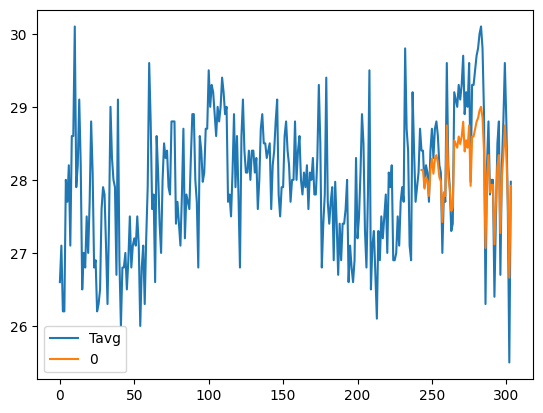

In [26]:
kan.plot()

In [27]:
new_data = [[0],[1],[2],[3],[4],[5],[6]]
lr.predict(new_data)

array([13.69616467, 14.20458906, 14.71301345, 15.22143784, 15.72986224,
       16.23828663, 16.74671102])

In [28]:
kan.to_json('prediksi_jawa tengah')